In [1]:
import pandas as pd
import pandas_profiling
from sklearn.manifold import TSNE

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from tsne_animate import tsneAnimate

In [ ]:
files = []

import glob, os
for file in glob.glob("../../Downloads/Lung/*.txt"):
    files.append(file)

In [29]:
pheno = pd.read_csv('Lung/Lung_Phenotype_Metadata.txt', sep='\t')

In [ ]:
prot = pd.read_csv('../../Downloads/Lung/Lung_Proteome.txt', sep='\t')
cnv = pd.read_csv('../../Downloads/Lung/Lung_CNV.txt', sep='\t')

In [ ]:
cnv['GeneChrStrand'] = cnv['Gene']+'_'+cnv['Chr']+'_'+cnv['Strand']

In [ ]:
del cnv['Gene']
del cnv['Chr']
del cnv['Start']
del cnv['Stop']

In [ ]:
del cnv['Strand']

In [ ]:
genechrstrand = cnv['GeneChrStrand']
del cnv['GeneChrStrand']

In [ ]:
cnv = cnv.transpose()

In [ ]:
cnv.head(3)

In [ ]:
prot = prot.transpose()

In [ ]:
new_header = prot.iloc[0] #grab the first row for the header
prot = prot[1:] #take the data less the header row
prot.columns = new_header #set the header row as the df header

In [ ]:
prot.head()

In [ ]:
merged = pd.merge(prot, cnv, left_index=True, right_index=True, how='outer')


In [ ]:
pheno = pd.read_csv('../../Downloads/Lung/Lung_Phenotype_Metadata.txt', sep ='\t')

In [ ]:
pheno.set_index('SampleID', inplace=True)

In [ ]:
m = pd.merge(merged, pd.DataFrame(pheno['Vital Status ']), left_index=True, right_index=True, how='outer')

---

In [ ]:
m.fillna(0, inplace=True)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
m = m[m['Vital Status ']!=0]

In [ ]:
scores = cross_val_score(clf, m.loc[:, m.columns != 'Vital Status ']
, m['Vital Status '], cv=3, verbose=2, n_jobs=-1, scoring='roc_auc')

In [ ]:
m['Vital Status '].value_counts()

In [ ]:
m

---

In [ ]:
mutation = pd.read_csv('../../Downloads/Lung/Lung_Mutation.txt', sep='\t')


In [ ]:
mutation.set_index('Sample_ID', inplace=True)

In [ ]:
mutation.head()

In [ ]:
m = pd.merge(m, mutation, right_index=True, left_index=True)

In [ ]:
m.to_csv('../../Downloads/Lung/prot_cnv_mut_pheno.csv', index=True)

---

In [ ]:
cnv = pd.read_csv('../../Downloads/Lung/Lung_CNV.txt', sep='\t')
ge = pd.read_csv('../../Downloads/Lung/Lung_GeneExpression.txt', sep='\t')

In [ ]:
ge.head()

In [ ]:
cnv.head()

In [ ]:
cnv['Gene'].value_counts()

In [ ]:
ge['Gene'].value_counts()

In [ ]:
pheno['Age At Diagnosis (Years)'].min()

In [ ]:
cnv.head()

In [ ]:
mutation.head()

In [ ]:
mutation.reset_index(inplace=True)

In [ ]:
mutation['Gene'].nunique()

In [ ]:
mutation['GeneChr'] = mutation['Gene'] + '_' + mutation['Chr']

In [ ]:
mutation['GeneChr'].nunique()

In [ ]:
mut_grouped = mutation.groupby(['Sample_ID'])['GeneChr'].value_counts()

In [ ]:
(1059,19758)

In [ ]:
gene_names = mutation['GeneChr'].unique()

In [ ]:
patients_mutation = mutation['Sample_ID'].unique()

In [ ]:
mutation_count = pd.DataFrame(0, index=patients_mutation, columns=gene_names)

In [ ]:
pd.DataFrame(mut_grouped).reset_index(drop=True)

---

In [2]:
df_upper = pd.read_csv('../BBD/df_upper.csv')

In [3]:
del df_upper['Unnamed: 0']

In [4]:
df_upper.set_index('rowname', inplace=True)

In [33]:
pheno.set_index('SampleID', inplace=True)

In [36]:
ph = pd.DataFrame(pheno['Diagnosis'])

In [39]:
diag = pd.merge(df_upper,ph, left_index=True, right_index=True, how='inner')

In [42]:
diag

,A1BGchr19_CNV,A1CFchr10_CNV,A2Mchr12_CNV,A2ML1chr12_CNV,A2MP1chr12_CNV,A3GALT2chr1_CNV,A4GALTchr22_CNV,A4GNTchr3_CNV,AAASchr12_CNV,AACSchr12_CNV,...,LA16c-306E5.2_chr16_mut,AL354873.1_chr10_mut,GNG5_chr1_mut,RP11-467L19.8_chr15_mut,SNORD114-21_chr14_mut,TRAJ53_chr14_mut,EBLN2_chr3_mut,PMS2P3_chr7_mut,FAM174B_chr15_mut,Diagnosis
TCGA-05-4244-01,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,Lung Adenocarcinoma
TCGA-05-4249-01,0,0,-1,-1,-1,-1,-1,-1,0,0,...,0,0,0,0,0,0,0,0,0,Lung Adenocarcinoma
TCGA-05-4250-01,-1,0,-1,-1,-1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Lung Adenocarcinoma
TCGA-05-4382-01,-1,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Lung Adenocarcinoma
TCGA-05-4384-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lung Adenocarcinoma
TCGA-05-4389-01,-1,1,1,1,1,0,-1,1,1,1,...,0,0,0,0,0,0,0,0,0,Lung Adenocarcinoma
TCGA-05-4390-01,1,1,-1,-1,-1,-1,-1,-1,1,1,...,0,0,0,0,0,0,0,0,0,Lung Adenocarcinoma
TCGA-05-4395-01,-1,0,1,1,1,0,-1,1,1,1,...,0,0,0,0,0,0,0,0,0,Lung Adenocarcinoma
TCGA-05-4396-01,-1,0,0,0,0,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,Lung Adenocarcinoma
TCGA-05-4397-01,-1,0,-1,-1,-1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Lung Adenocarcinoma


In [43]:
non_squamous = diag.loc[diag['Diagnosis']=='Lung Adenocarcinoma',]
squamous = diag.loc[diag['Diagnosis'] == 'Lung Squamous Cell Carcinoma',]

In [44]:
squamous = squamous.loc[:, squamous.columns != 'Diagnosis']
non_squamous = non_squamous.loc[non_squamous['Diagnosis']=='Lung Adenocarcinoma',]

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1024 samples in 1.765s...
[t-SNE] Computed neighbors for 1024 samples in 70.244s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1024
[t-SNE] Computed conditional probabilities for sample 1024 / 1024
[t-SNE] Mean sigma: 34.976998
[t-SNE] Computed conditional probabilities in 0.126s
[t-SNE] Iteration 50: error = 79.3925171, gradient norm = 0.2903374 (50 iterations in 2.288s)
[t-SNE] Iteration 100: error = 85.8250809, gradient norm = 0.2433277 (50 iterations in 2.454s)
[t-SNE] Iteration 150: error = 86.2161102, gradient norm = 0.2486391 (50 iterations in 2.439s)
[t-SNE] Iteration 200: error = 85.4511948, gradient norm = 0.2705184 (50 iterations in 2.543s)
[t-SNE] Iteration 250: error = 88.1030655, gradient norm = 0.2660271 (50 iterations in 2.691s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.103065
[t-SNE] Iteration 300: error = 1.9474752, gradient norm = 0.0047523 (50 iterations in 2.48

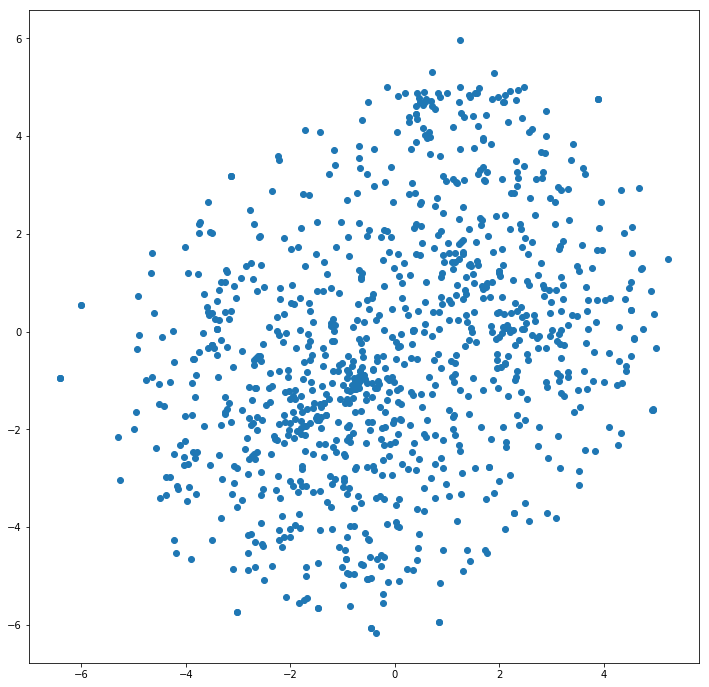

In [48]:
tsne = TSNE(perplexity=100, verbose=2).fit_transform(diag.loc[:,diag.columns!='Diagnosis'], diag['Diagnosis'])
plt.figure(figsize=(12,12))
plt.scatter(tsne[:,0],tsne[:,1])

In [ ]:
df_upper.shape

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30,20))
perplexities = [2,5,30,50,100]
for i, ax in enumerate(fig.axes):
    print(i)
    tsne = TSNE(perplexity=perplexities[i], verbose=2).fit_transform(df_upper)
    ax.scatter(tsne[:,0],tsne[:,1])

In [ ]:
fig.savefig('../../Documents/BBD/tsne.png', dpi=300)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1001 samples in 1.481s...
[t-SNE] Computed neighbors for 1001 samples in 67.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1001
[t-SNE] Computed conditional probabilities for sample 1001 / 1001
[t-SNE] Mean sigma: 34.742422
[t-SNE] Computed conditional probabilities in 0.126s
[t-SNE] Iteration 50: error = 80.2159424, gradient norm = 0.3023827 (50 iterations in 2.251s)
[t-SNE] Iteration 100: error = 84.9983902, gradient norm = 0.2544365 (50 iterations in 2.384s)
[t-SNE] Iteration 150: error = 88.3856735, gradient norm = 0.2183704 (50 iterations in 2.440s)
[t-SNE] Iteration 200: error = 84.6932144, gradient norm = 0.2956158 (50 iterations in 2.521s)
[t-SNE] Iteration 250: error = 87.6866684, gradient norm = 0.2491520 (50 iterations in 2.498s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.686668
[t-SNE] Iteration 300: error = 1.8020858, gradient norm = 0.0046203 (50 iterations in 2.18

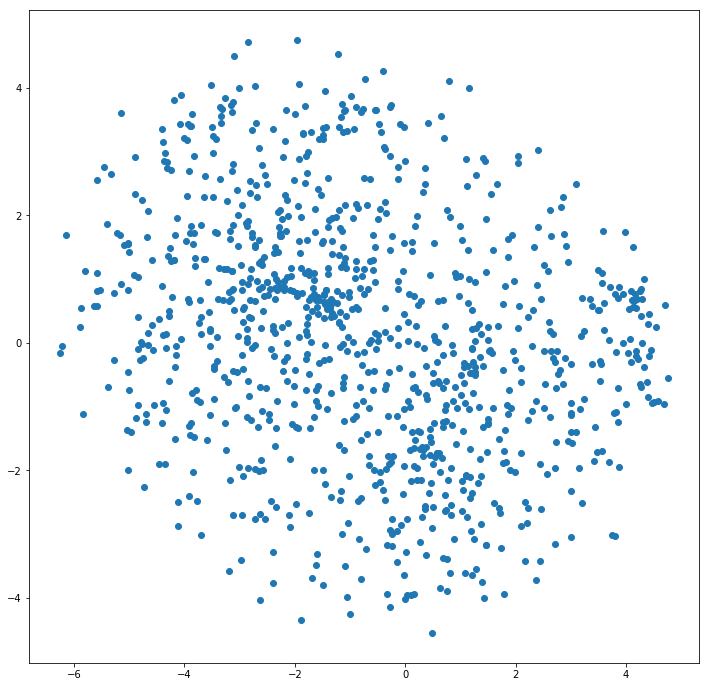

In [16]:
tsne = TSNE(perplexity=100, verbose=2).fit_transform(df_upper)
plt.figure(figsize=(12,12))
plt.scatter(tsne[:,0],tsne[:,1])

In [17]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=2, random_state=0).fit_transform(tsne)

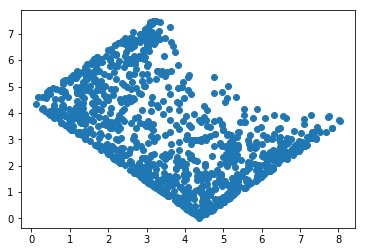

In [23]:
plt.scatter(kmeans[:,0], kmeans[:,1])

In [24]:
kmeans

array([[1.8759551, 2.6675408],
       [3.8406491, 3.3811657],
       [1.6268728, 6.0333343],
       ...,
       [6.025649 , 1.7225597],
       [6.03172  , 2.4813707],
       [4.7785196, 3.2068937]], dtype=float32)

---

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
p = pca.fit_transform(df_upper)

In [ ]:
plt.scatter(p[:,0], p[:,1])

---

In [25]:
methyl = pd.read_csv('Lung/Lung_Methylation.txt', sep='\t')

In [26]:
methyl.head()

,probeID,Chr,Start,Stop,Strand,Gene,Relation_CpG_Island,TCGA-44-4112-01,TCGA-NJ-A4YP-01,TCGA-22-4613-01,...,TCGA-63-A5MY-01,TCGA-50-6593-01,TCGA-33-AASL-01,TCGA-85-A512-01,TCGA-85-8354-01,TCGA-O2-A5IB-01,TCGA-50-6591-11,TCGA-77-7335-01,TCGA-55-8302-01,TCGA-05-4425-01
0,cg00000029,chr16,53434199.0,53434201.0,-,RBL2,N_Shore,0.34335,0.3992,0.3073,...,0.1276,0.3584,0.3297,0.3566,0.0967,0.4302,0.2932,0.3076,0.2958,0.3654
1,cg00000108,chr3,37417714.0,37417716.0,-,C3orf35,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cg00000109,chr3,172198246.0,172198248.0,-,FNDC3B,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cg00000165,chr1,90729116.0,90729118.0,+,BARHL2,S_Shore,0.48315,0.5491,0.6697,...,0.3450,0.4432,0.4646,0.7605,0.8055,0.7340,0.2425,0.6139,0.4604,0.5445
4,cg00000236,chr8,42405775.0,42405777.0,+,VDAC3,NaN,0.85435,0.7632,0.9144,...,0.9105,0.8245,0.7427,0.9174,0.9297,0.9295,0.8278,0.8951,0.8687,0.8513
